1. `Man`이라는 클래스를 정의
2. `Man` 클래스에서 `m`이라는 인스턴스(객체) 생성
3. `Man`의 생성자(init)는 name이라는 인수를 받고, 그 인수로 인스턴스 변수인 `self.name`을 초기화(인스턴스 변수는 인스턴스별로 저장되는 변수)

In [3]:
class Man:
    def __init__(self, name):
        self.name = name
        print('Initialized!')
        
    def hello(self):
        print('안녕, ' + self.name + '!')
        
    def goodbye(self):
        print('잘가, ' + self.name + '!')
    
m = Man('해삼')
m.hello()
m.goodbye()

Initialized!
안녕, 해삼!
잘가, 해삼!


## Numpy
딥러닝을 구현하다 보면 배열이나 행렬 계산이 많이 등장합니다. 넘파이의 배열 클래스인 `numpy.array`에는 편리한 메서드가 많이 준비되어 있어, 딥러닝을 구현할 때 이 메서드들을 이용합니다.

### 1.1 넘파이 가져오기
넘파이는 외부 라이브러리입니다. 여기서 말하는 '외부'는 표준 파이썬에는 포함되지 않는다는 것입니다. 그래서 우선 넘파이 라이브러리를 쓸 수 있도록 가져와야(import) 합니다.

In [3]:
import numpy as np

### 1.2 넘파이 배열 생성하기
넘파이 배열을 만들 때는 `np.array()` 메서드를 이용합니다. `np.array()`는 파이썬의 리스트를 인수로 받아 넘파이 라이브러리가 제공하는 특수한 형태의 배열(`numpy.ndarray`)을 반환합니다.

In [6]:
x = np.array([1.0, 2.0, 3.0])
print(x)

[1. 2. 3.]


In [7]:
type(x)

numpy.ndarray

### 1.3 넘파이의 산술 연산

In [9]:
x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 4.0, 6.0])
print(x + y) # 원소별 덧셈
print(x - y) # 원소별 뺄셈
print(x * y) # 원소별 곱셈
print(x / y) # 원소별 나눗셈

[3. 6. 9.]
[-1. -2. -3.]
[ 2.  8. 18.]
[0.5 0.5 0.5]


여기서 주의할 점은 배열 `x`와 `y`의 **원소의 수가 같다는 것**입니다(둘 다 원소를 3개씩 갖는 1차원 배열). `x`와 `y`의 원소 수가 같다면 산술 연산은 각 원소에 대해 행해집니다. 원소 수가 다르면 오류가 발생하니 원소 수 맞추기는 중요합니다. 참고로, '원소별'이라는 말은 영어로 **element-wise**라고 합니다. 예컨대 '원소별 곱셉'은 element-wise product라고 합니다.  
  
넘파이 배열은 원소별 계산뿐 아니라 넘파이 배열과 수치 하나(스칼라)의 조합으로 된 산술 연사도 수행할 수 있습니다. 이 경우 스칼라값과의 계산이 넘파이 배열의 원소별로 한 번씩 수행됩니다. 이 기능을 **브로드캐스트**라고 합니다.

In [10]:
### 브로드캐스팅(broadcasting) - 연산 중에 다른 모양(shapes)의 배열을 처리하는 방법
x = np.array([1.0, 2.0, 3.0])
x/2

array([0.5, 1. , 1.5])

### 1.4 넘파이의 N차원 배열
넘파이는 1차원 배열(1줄로 늘어선 배열)뿐 아니라 다차원 배열로 작성할 수 있습니다. 예를 들어 2차원 배열(행렬)은 다음처럼 작성합니다.

In [4]:
A = np.array([[1, 2], [3, 4]])
print(A)
print(A.shape)
print(A.dtype)

[[1 2]
 [3 4]]
(2, 2)
int32


방금 2x2의 `A`라는 행렬을 작성했습니다. 행렬의 크기는 `shape`로, 행렬에 담긴 원소의 자료형은 `dtype`으로 알 수 있습니다. 이어서 행렬의 산술 연산을 봅시다.

In [14]:
B = np.array([[3, 0],[0, 6]])
print(A + B)
print(A * B)

[[ 4  2]
 [ 3 10]]
[[ 3  0]
 [ 0 24]]


shape가 같은 행렬끼리면 행렬의 산술 연산도 대응하는 원소별로 계산됩니다. 배열과 마찬가지로 말이죠. 행렬과 스칼라값의 산술 연산도 가능합니다. 이때도 배열과 마찬가지로 브로드캐스팅 기능이 작동합니다.

In [15]:
print(A)
print(A*10)

[[1 2]
 [3 4]]
[[10 20]
 [30 40]]


> 넘파이 배열은 N차원 배열을 작성할 수 있습니다. 1차원 배열, 2차원 배열, 3차원 배열처럼 원하는 차수의 배열을 만들 수 있다는 뜻입니다. 수학에서는 1차원 배열은 **벡터(vector)**, 2차원 배열은 **행렬(matrix)**이라고 부릅니다. 또 벡터와 행렬을 일반화한 것을 **텐서(tensor)**라고 합니다. 이 책에서는 기본적으로 2차원 배열을 '행렬', 3차원 이상의 배열을 '다차원 배열'이라고 하겠습니다.

### 1.5 브로드캐스트
넘파이에서는 shape가 다른 배열끼리도 계산할 수 있습니다. 앞의 예에서는 2x2 행렬 `A`에 스칼라값 10을 곱했습니다. 이때 다음 그림과 같이 10이라는 스칼라값이 2x2 행렬로 확장된 후 연산이 이루어집니다. 이러한 기능을 **브로드캐스트(broadcast)**라고 합니다.
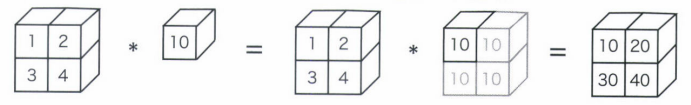

In [16]:
A = np.array([[1, 2], [3, 4]])
B = np.array([10, 20])

A * B

array([[10, 40],
       [30, 80]])

여기에서는 다음 그림처럼 1차월 배열인 `B`가 똑똑하게도 2차원 배열 `A`와 동일한 shape로 변형된 후 연산이 이루어집니다.
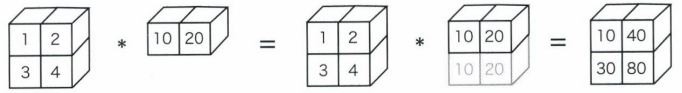

### 1.6 원소 접근
원소의 인덱스는 0부터 시작합니다. 그리고 각 원소에 접근하려면 다음과 같이 합니다.

In [10]:
X = np.array([[51, 55], [14, 19], [0, 4]])
print(X)
print(X[0])
print(X[0][1])

[[51 55]
 [14 19]
 [ 0  4]]
[51 55]
55


for문으로도 각 원소에 접근할 수 있습니다.

In [11]:
for row in X:
    print(row)

[51 55]
[14 19]
[0 4]


넘파이는 지금까지의 방법 외에도, 인덱스를 배열로 지정해 한 번에 여러 원소에 접근할 수도 있습니다.

In [13]:
X = X.flatten() # X를 1차원 배열로 변환(평탄화)
print(X)

[51 55 14 19  0  4]


In [14]:
X[np.array([0, 2, 4])] # 인덱스가 0, 2, 4인 원소 얻기

array([51, 14,  0])

이 기법을 응용하면 특정 조건을 만족하는 원소만 얻을 수 있습니다. 예컨대 다음과 같이 배열 X에서 15 이상인 값만 구할 수 있습니다.

In [17]:
X > 15

array([ True,  True, False,  True, False, False])

In [18]:
X[X>15]

array([51, 55, 19])

넘파이 배열에 부등호 연산자를 사용한 결과는 bool 배열입니다. 여기에서는 이 bool 배열을 사용해 배열 X에서 True에 해당하는 원소, 즉 값이 15보다 큰 원소만 꺼내고 있습니다.

## matplotlib
딥러닝 실험에서는 그래프 그리기와 데이터 시각화도 중요합니다. `matplotlib`은 그래프를 그려주는 라이브러리입니다. matplotlib을 사용하면 그래프 그리기와 데이터 시각화가 쉬워집니다. 이번 절에서는 그래프를 그리고 이미지를 화면에 표시하는 방법을 설명합니다.

### 2.1 단순한 그래프 그리기
그래프를 그리려면 matplotlib의 `pyplot` 모듈을 사용합니다. 당장 sin 함수를 그리는 예를 살펴봅시다.

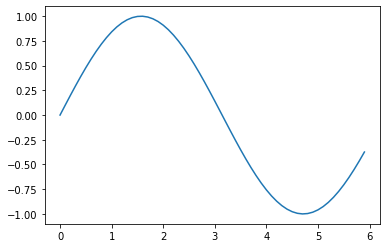

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
x = np.arange(0, 6, 0.1)  # 0부터 6까지 0.1 간격으로 생성
y = np.sin(x)

# 그래프 그리기
plt.plot(x, y)
plt.show()

이 코드에서는 넘파이의 `arange` 메서드로 [0, 0.1, 0.2, ..., 5.8, 5.9]라는 데이터를 생성하여 변수 x에 할당했습니다. 그 다음 줄에서는 x의 각 원소에 넘파이의 sin 함수인 `np.sin()`을 적용하여 변수 y에 할당합니다. 이제 x와 y를 인수로 `plt.plot` 메서드를 호출해 그래프를 그립니다. 마지막으로 `plt.show()`를 호출해 그래프를 화면에 출력하고 끝납니다.

### 2.2 pyploy의 기능
여기에 cos함수도 추가로 그려보겠습니다. 또, 제목과 각 축의 이름(레이블) 표시 등, `pyplot`의 다른 기능도 사용해보겠습니다.

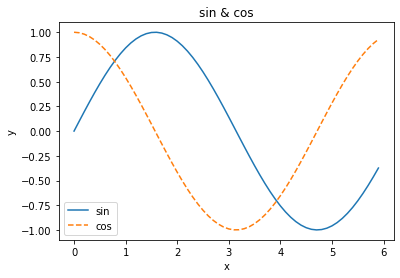

In [20]:
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# 그래프 그리기
plt.plot(x, y1, label='sin')
plt.plot(x, y2, label='cos', linestyle='--') # cos 함수는 점선으로 그리기
plt.xlabel('x')  # x축 label
plt.ylabel('y')  # y축 label
plt.title('sin & cos') # 제목
plt.legend()  # 범례 표시
plt.show()

### 2.3 이미지 표시하기
`pyplot`에는 이미지를 표시해주는 메서드인 `imshow()`도 준비되어 있습니다. 이미지를 읽어들일 때는 `matplotlib.image` 모듈의 `imread()` 메서드를 이용합니다.

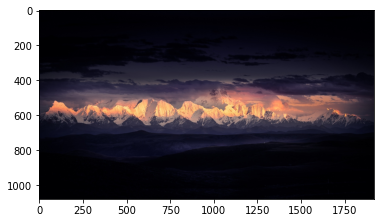

In [21]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('./test.jpg')

plt.imshow(img)
plt.show()

## 정리
이번 장은 딥러닝으로의 본격적인 여정을 위한 준비 과정입니다. 특히, 딥러닝(신경망)을 구현하는 데 필요한 프로그래밍의 기본을 중심으로 살펴보았습니다. 다음 장에서 파이썬으로 실제로 작동하는 코드를 작성해보면서 딥러닝의 세계로 떠나볼 겁니다.  

> 이번 장에서 배운 내용
> - 파이썬은 간단하고 익히기 쉬운 프로그래밍 언어다.
>- 파이썬은 오픈 소스여서 자유롭게 사용할 수 있다.
>- 이 책은 딥러닝 구현에 파이썬 3 버전을 이용한다.
>- 외부 라이브러리로는 numpy와 matplotlib을 이용한다.
>- 파이썬을 실행하는 방식에는 '인터프리터'와 '스크립트 파일' 두 가지가 있다.
>- 파이썬에서는 함수와 클래스 같은 모듈로 구현을 정리할 수 있다.
>- numpy는 다차원 배열을 다루는 편리한 메서드를 많이 제공한다.